In [331]:
import numpy as np 
import pandas as pd
import os

In [332]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [333]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [334]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [336]:
df.shape

(6607, 20)

C:\Users\Sathish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


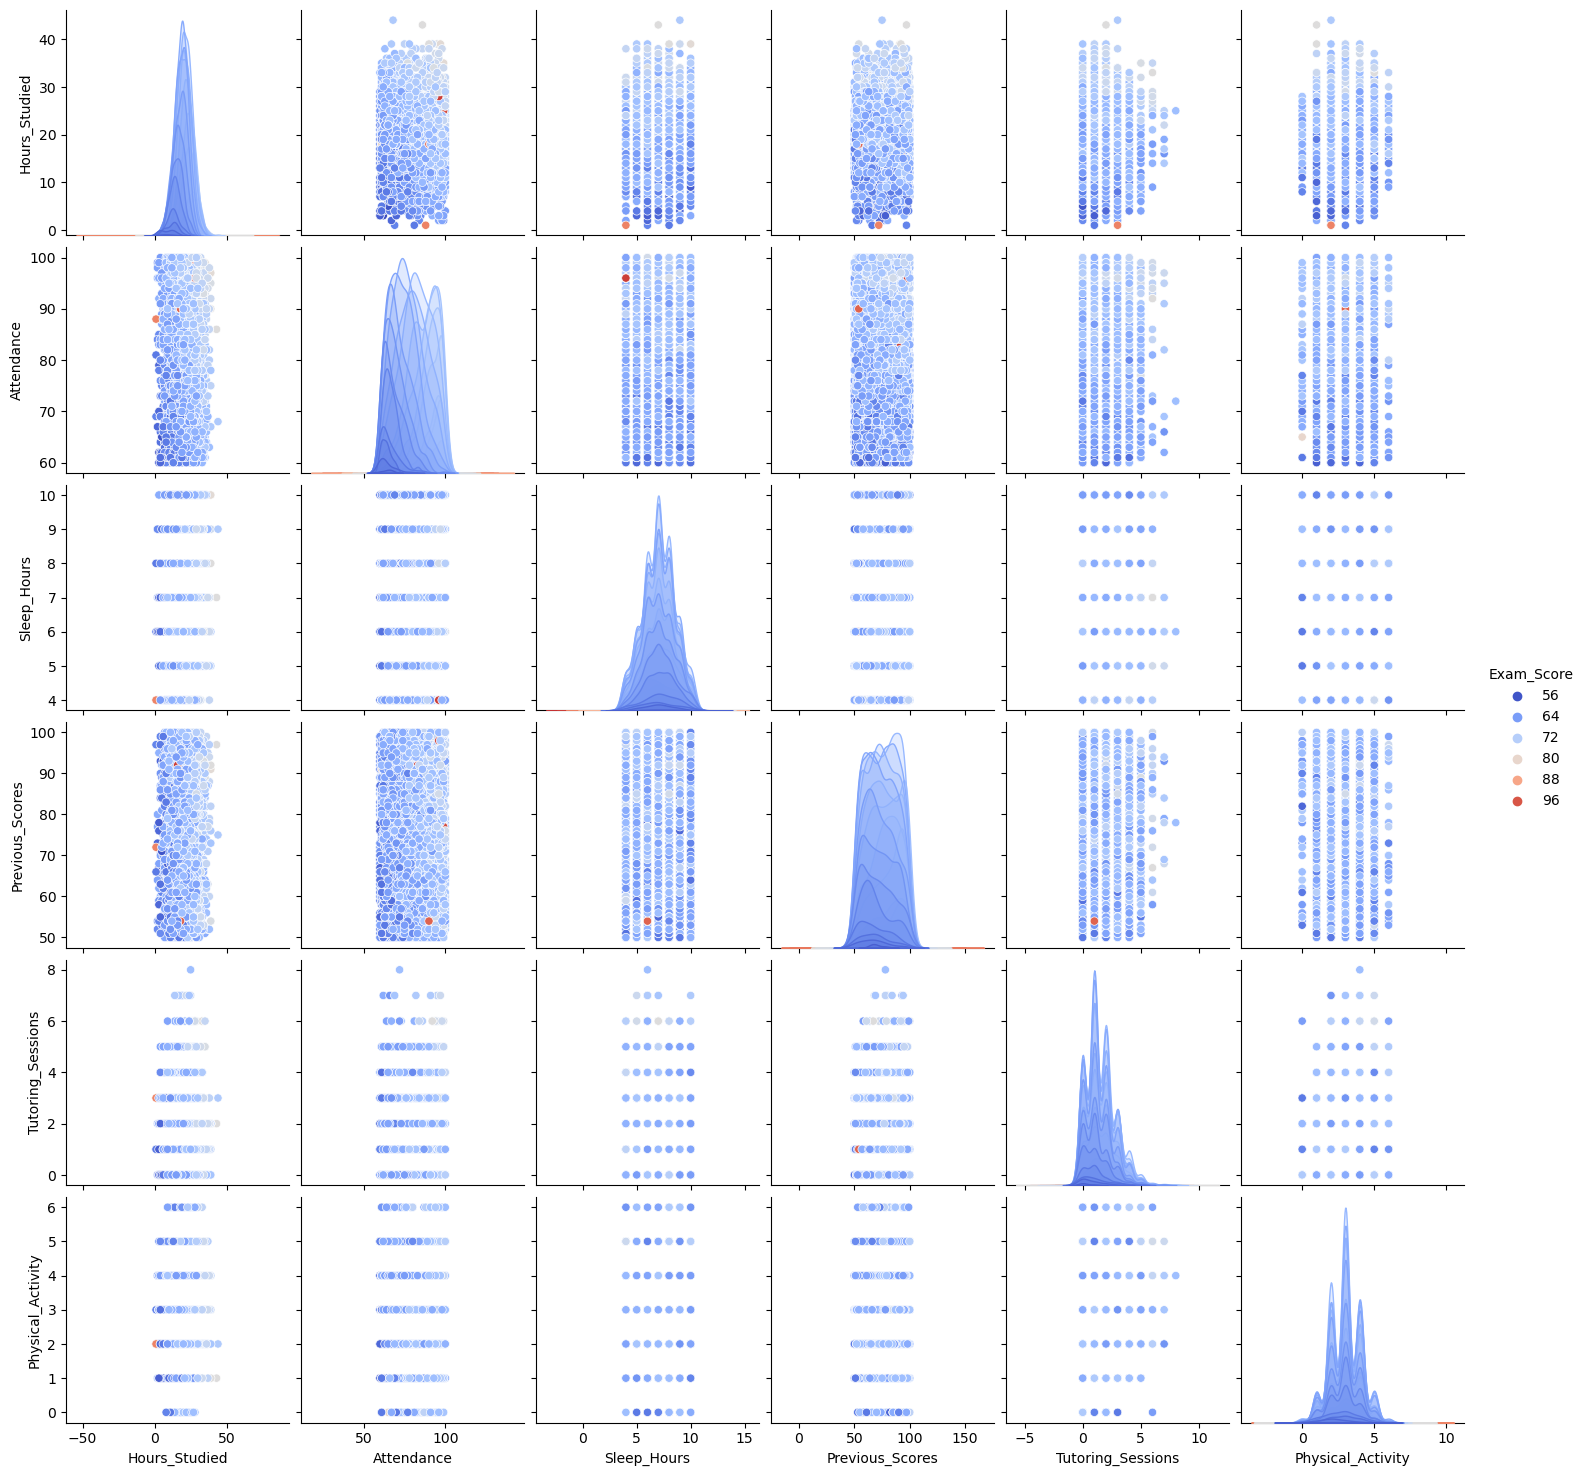

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue="Exam_Score", palette="coolwarm",)
plt.show()

In [338]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [339]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print(df.head())

   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    0   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 1   
1                           0            8               59                 1   
2                           1            7               91                 2   
3                           1            8               98                 2   
4                           1            6               65                 2   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_

In [340]:
x=df[["Hours_Studied","Attendance","Parental_Involvement","Access_to_Resources","Extracurricular_Activities","Sleep_Hours","Previous_Scores","Motivation_Level","Internet_Access","Tutoring_Sessions"
      ,"Family_Income","Teacher_Quality","School_Type","Physical_Activity","Learning_Disabilities","Parental_Education_Level","Distance_from_Home","Gender"]]
y=df["Exam_Score"]

In [341]:
from sklearn.model_selection import train_test_split

In [342]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [343]:
from sklearn.linear_model import LinearRegression

In [344]:
linear_model = LinearRegression()

In [345]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [346]:
y_pred=linear_model.predict(x_test)

In [347]:
y_test

743     65
5551    65
3442    71
6571    64
4204    66
        ..
4709    69
3664    72
5231    66
1773    63
5782    72
Name: Exam_Score, Length: 1322, dtype: int64

In [348]:
from sklearn.metrics import r2_score

In [349]:
r2_score_ = r2_score(y_test,y_pred)

In [350]:
r2_score_

0.6772754455080117

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int32
 3   Access_to_Resources         6607 non-null   int32
 4   Extracurricular_Activities  6607 non-null   int32
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int32
 8   Internet_Access             6607 non-null   int32
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int32
 11  Teacher_Quality             6607 non-null   int32
 12  School_Type                 6607 non-null   int32
 13  Peer_Influence              6607 non-null   int32
 14  Physical

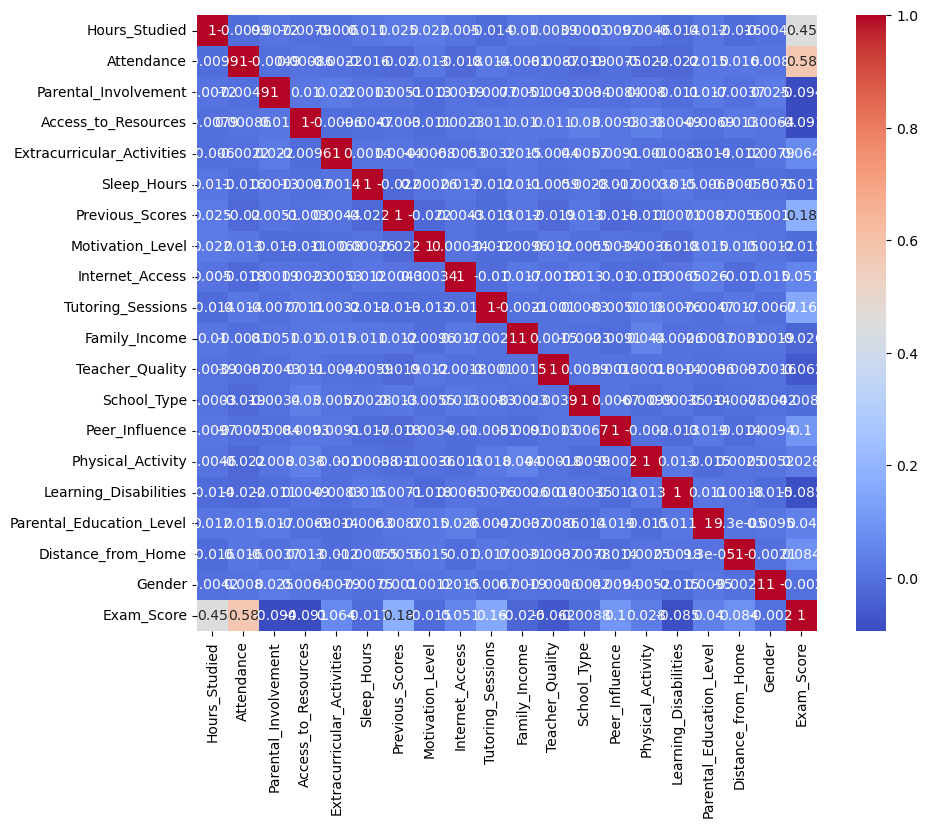

In [352]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [353]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [354]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [355]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [356]:
lasso_model  = Lasso(alpha=0.01) 
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.01)

In [357]:
lasso_coeff = lasso_model.coef_

In [358]:
lasso_coeff

array([ 1.72006513e+00,  2.27143504e+00, -3.78890766e-01, -3.37301980e-01,
        2.71966574e-01, -3.64976853e-02,  6.79383206e-01, -1.10718890e-01,
        2.41093219e-01,  6.05480036e-01, -1.20052601e-01, -2.02266401e-01,
       -1.28410988e-03,  1.68127826e-01, -2.65387268e-01,  1.15525844e-01,
        2.86715877e-01, -0.00000000e+00])

In [359]:
selected_features = x.columns[(lasso_coeff != 0)]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home'],
      dtype='object')


In [360]:
selected_features.shape

(17,)

In [361]:
x_selected = x[selected_features]

In [362]:
x_train,x_test,y_train,y_test = train_test_split(x_selected,y,test_size=0.2,random_state=42)

In [363]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [398]:
y_pred_2 = linear_model.predict(x_test)

In [400]:
y_pred_2

array([65.83626584, 67.54417241, 69.37726584, ..., 66.09172446,
       65.50836071, 70.09941841])

In [402]:
r2_score_2 = r2_score(y_test,y_pred_2)

In [404]:
r2_score_2

0.6772531871578902